In [1]:
import matplotlib

matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

In [2]:
#import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
#import matplotlib.pyplot as plt
%matplotlib inline

# Plotting

In [3]:
data_reduced_genus = pd.read_csv("./results/reduced_data--genus_only.csv")

In [4]:
from abundance_utils import filter_by_abundance

filter_by_abundance(data=data_reduced_genus, 
                    column='abundance', high=1, low=0.5).head()

['Methylobacter' 'Methylophilus' 'Methylosarcina' 'other']


,ID,rep,week,oxy,Genus,Length,abundance,project
0,106_HOW12,4,12,High,Methylobacter,4325001,0.701923,1056226
1,76_LOW10,4,10,Low,Methylobacter,6062067,0.701577,1056166
2,94_HOW11,4,11,High,Methylobacter,5268714,0.698849,1056202
3,82_HOW10,4,10,High,Methylobacter,5488758,0.693746,1056178
4,40_LOW7,4,7,Low,Methylobacter,6012817,0.668513,1056094


## Demo `plot_heatmap()`

keep only High oxygen samples
['Methylobacter' 'Methylophilus' 'Methylosarcina' 'other']
filename: High_oxygen--0.5_to_0.6_abundance


/Users/janet/.virtualenvs/meta4/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


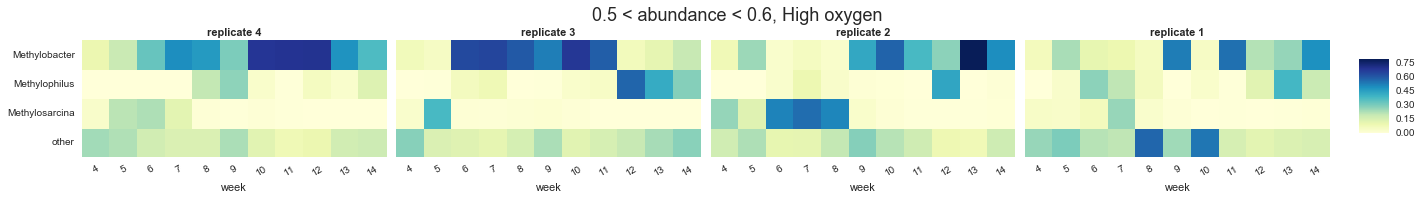

In [5]:
from abundance_plot_utils import plot_heatmap

# demo:
plot_heatmap(dataframe=data_reduced_genus, high=0.6, low = 0.5, 
             oxy='High', rep='all', 
             plot_dir="./plots/facet_replicate")

## Run `plot_heatmap()` across braod conditions

In [6]:
#data_reduced_genus[data_reduced_genus['ID']=='79_HOW10'].head()

In [7]:
#data_reduced_genus[data_reduced_genus['Genus']=='other'].head()

In [8]:
#data_reduced_genus.columns

## `plot_across_phylogeny()`

Reproduce Mila's plots which often have mixed phylogeny levels.

Import the data that was *not* reduced to Genus. 

In [9]:
data_reduced = pd.read_csv("./results/reduced_data--all_phylogeny_remains.csv")

In [10]:
from abundance_plot_utils import other_phylogeny_levels

other_phylogeny_levels('Family')

['Kingdom', 'Phylum', 'Class', 'Order', 'Genus']

In [11]:
from abundance_plot_utils import sum_on_phylogeny

In [12]:
tmp = sum_on_phylogeny(dataframe = data_reduced,
                phylo_level = 'Phylum',
                name = 'Bacteroidetes')

Index(['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Length',
       'abundance', 'filepath', 'project', 'ID', 'oxy', 'rep', 'week'],
      dtype='object')


In [13]:
tmp.head()

Phylum         ID       
Bacteroidetes  100_LOW12    0.016338
               103_HOW12    0.020091
               104_HOW12    0.084478
               105_HOW12    0.002782
               106_HOW12    0.004402
Name: abundance, dtype: float64

In [14]:
type(tmp)

pandas.core.series.Series

In [15]:
tmp.shape

(88,)

In [16]:
from abundance_plot_utils import aggregate_mixed_phylogeny

In [17]:
plot_1_spec_dict = {'Phylum':['Bacteroidetes'], 
                    'Order':['Burkholderiales','Methylophilales',
                             'Methylococcales']}

In [18]:
plot_1_data = aggregate_mixed_phylogeny(dataframe = 
                          pd.read_csv(
        "./results/reduced_data--all_phylogeny_remains.csv"),
                          phylo_dict = plot_1_spec_dict)

Bacteroidetes
Index(['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Length',
       'abundance', 'filepath', 'project', 'ID', 'oxy', 'rep', 'week'],
      dtype='object')
reduced_rows.head(2)
          Phylum         ID  abundance
0  Bacteroidetes  100_LOW12   0.016338
1  Bacteroidetes  103_HOW12   0.020091
reduced_rows.head(2)
          ID  abundance
0  100_LOW12   0.016338
1  103_HOW12   0.020091
          ID  abundance sum phylogenetic level phylogenetic name
0  100_LOW12       0.016338             Phylum     Bacteroidetes
1  103_HOW12       0.020091             Phylum     Bacteroidetes
Burkholderiales
Index(['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Length',
       'abundance', 'filepath', 'project', 'ID', 'oxy', 'rep', 'week'],
      dtype='object')
reduced_rows.head(2)
             Order         ID  abundance
0  Burkholderiales  100_LOW12   0.058808
1  Burkholderiales  103_HOW12   0.100325
reduced_rows.head(2)
          ID  abundance
0  100_LOW12   0.

In [19]:
plot_1_data.head()

,ID,abundance sum,phylogenetic level,phylogenetic name,oxy,rep,week,project
0,100_LOW12,0.016338,Phylum,Bacteroidetes,Low,4,12,1056214
1,100_LOW12,0.058808,Order,Burkholderiales,Low,4,12,1056214
2,100_LOW12,0.103922,Order,Methylophilales,Low,4,12,1056214
3,100_LOW12,0.673723,Order,Methylococcales,Low,4,12,1056214
4,103_HOW12,0.020091,Phylum,Bacteroidetes,High,1,12,1056217


In [20]:
plot_1_data[['phylogenetic level', 'phylogenetic name']].drop_duplicates()

,phylogenetic level,phylogenetic name
0,Phylum,Bacteroidetes
1,Order,Burkholderiales
2,Order,Methylophilales
3,Order,Methylococcales


In [21]:
plot_1_data.shape

(352, 8)

In [22]:
plot_1_data.shape

(352, 8)

In [ ]:
from abundance_plot_utils import plot_across_phylogeny

In [ ]:
plot_1_spec_dict = {'Phylum':['Bacteroidetes'], 
                    'Order':['Burkholderiales', 'Methylophilales',
                             'Methylococcales']}

g = plot_across_phylogeny(dataframe = 
                          pd.read_csv(
        "./results/reduced_data--all_phylogeny_remains.csv"),
                          phylo_dict = plot_1_spec_dict)

Bacteroidetes
Index(['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Length',
       'abundance', 'filepath', 'project', 'ID', 'oxy', 'rep', 'week'],
      dtype='object')
reduced_rows.head(2)
          Phylum         ID  abundance
0  Bacteroidetes  100_LOW12   0.016338
1  Bacteroidetes  103_HOW12   0.020091
reduced_rows.head(2)
          ID  abundance
0  100_LOW12   0.016338
1  103_HOW12   0.020091
          ID  abundance sum phylogenetic level phylogenetic name
0  100_LOW12       0.016338             Phylum     Bacteroidetes
1  103_HOW12       0.020091             Phylum     Bacteroidetes
Burkholderiales
Index(['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Length',
       'abundance', 'filepath', 'project', 'ID', 'oxy', 'rep', 'week'],
      dtype='object')
reduced_rows.head(2)
             Order         ID  abundance
0  Burkholderiales  100_LOW12   0.058808
1  Burkholderiales  103_HOW12   0.100325
reduced_rows.head(2)
          ID  abundance
0  100_LOW12   0.

In [ ]:
g.fig

In [ ]:
p_dicts = [
    {'Phylum':['Bacteroidetes'], 
     'Order':['Burkholderiales', 'Methylophilales', 'Methylococcales']},
        
    {'Genus':['Methylobacter', 'Methylovulum', 'Methylomonas', 'Methylomicrobium', 
              'Methyloglobulus', 'Methylococcus', 'Methylocaldum', 'Methanosarcina']},
    
    {'Genus':['Methylotenera', 'Methylovorus', 'Methylophilus', 'Methylobacillus']}

    ]

In [ ]:
for p_dict in p_dicts:
    plot_across_phylogeny(dataframe = 
                          pd.read_csv("./results/reduced_data--all_phylogeny_remains.csv"),
                          phylo_dict = p_dict)
    

In [ ]:
plot_across_phylogeny(dataframe = 
                          pd.read_csv("./results/reduced_data--all_phylogeny_remains.csv"),
                          phylo_dict = {'Genus':['Methylobacter', 'Methylovulum', 
                                                 'Methylomonas', 'Methylomicrobium',
                                                 'Methyloglobulus', 'Methylococcus', 
                                                 'Methylocaldum', 'Methanosarcina',
                                                 'Methylosarcina'
                                                 ]})